In [1]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
import torch.nn as nn

In [2]:
X = np.arange(-5,5,0.01)
y = 4*X**3 + 2**X + 3
print(X.shape, y.shape)

(1000,) (1000,)


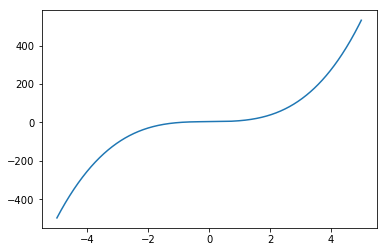

In [3]:
plt.plot(X,y)

### Creating variable from numpy arrays
Similar to tensorflow placeholders

In [4]:
batch = Variable(torch.from_numpy(X[:4, np.newaxis])) 
batch

Variable containing:
-5.0000
-4.9900
-4.9800
-4.9700
[torch.DoubleTensor of size 4x1]

### Concatanating along axis

In [5]:
torch.cat((batch, batch), 1)

Variable containing:
-5.0000 -5.0000
-4.9900 -4.9900
-4.9800 -4.9800
-4.9700 -4.9700
[torch.DoubleTensor of size 4x2]

### Convert tensors to type float for easy usage in nn layers

In [6]:
batch = Variable(torch.from_numpy(X[:4, np.newaxis])).float() ## Converting to float is important for GPU
batch

Variable containing:
-5.0000
-4.9900
-4.9800
-4.9700
[torch.FloatTensor of size 4x1]

## Matix multiplication as Layer operation

In [7]:
nn.Linear(1,3)(batch)

Variable containing:
 2.5643 -4.5255 -3.6989
 2.5608 -4.5177 -3.6915
 2.5573 -4.5099 -3.6841
 2.5538 -4.5022 -3.6767
[torch.FloatTensor of size 4x3]

## Do the same for target

In [8]:
target = Variable(torch.from_numpy(y[:4, np.newaxis])).float()
target

Variable containing:
-496.9688
-493.9745
-490.9923
-488.0220
[torch.FloatTensor of size 4x1]

### Broadcasting surrogate

In [9]:
hidden = Variable(torch.zeros(1,3))
hidden

Variable containing:
 0  0  0
[torch.FloatTensor of size 1x3]

In [10]:
h = nn.Linear(3,3)(hidden)
h

Variable containing:
 0.3833 -0.0681 -0.3823
[torch.FloatTensor of size 1x3]

In [11]:
x = nn.Linear(1,3)(batch)
x

Variable containing:
 4.2940  2.2900  2.3637
 4.2864  2.2863  2.3605
 4.2788  2.2826  2.3573
 4.2711  2.2789  2.3542
[torch.FloatTensor of size 4x3]

In [12]:
try:
    x + h ## Will give error
except RuntimeError as e:
    print(e)

inconsistent tensor size at /data/users/soumith/miniconda2/conda-bld/pytorch-cuda80-0.1.6_1485185046107/work/torch/lib/TH/generic/THTensorMath.c:601


In [13]:
h.expand_as(x) ## This makes h same size as x and compatible for addition

Variable containing:
 0.3833 -0.0681 -0.3823
 0.3833 -0.0681 -0.3823
 0.3833 -0.0681 -0.3823
 0.3833 -0.0681 -0.3823
[torch.FloatTensor of size 4x3]

In [14]:
x + h.expand_as(x) ## Finally

Variable containing:
 4.6773  2.2220  1.9813
 4.6697  2.2183  1.9782
 4.6621  2.2146  1.9750
 4.6544  2.2109  1.9718
[torch.FloatTensor of size 4x3]

### Getting the size of the tensor of variable

In [15]:
x.size()

torch.Size([4, 3])

In [16]:
x.size(0)

4

In [17]:
x.size()[0], x.size()[1], 

(4, 3)

In [18]:
isinstance(x.size(), tuple)

True

In [19]:
x

Variable containing:
 4.2940  2.2900  2.3637
 4.2864  2.2863  2.3605
 4.2788  2.2826  2.3573
 4.2711  2.2789  2.3542
[torch.FloatTensor of size 4x3]

## Get data-tensor inside a variable

In [20]:
x.data


 4.2940  2.2900  2.3637
 4.2864  2.2863  2.3605
 4.2788  2.2826  2.3573
 4.2711  2.2789  2.3542
[torch.FloatTensor of size 4x3]

In [21]:
try:
    x.numpy()
except AttributeError as e:
    print("Numpy conversion happens only on tensors and not variables.")
    print(e)

Numpy conversion happens only on tensors and not variables.
numpy


In [22]:
x.data.numpy() ## succeeds

array([[ 4.29398966,  2.29004574,  2.36365867],
       [ 4.28637409,  2.28633237,  2.36049843],
       [ 4.27875805,  2.282619  ,  2.35733843],
       [ 4.27114201,  2.27890563,  2.35417819]], dtype=float32)

## Simple linear regression

In [23]:
np.random.seed(1337)
X = np.random.randn(1000,1)*4
W = np.array([0.5,])
bias = -1.68

In [24]:
y_true = np.dot(X, W) + bias
y = y_true + np.random.randn(X.shape[0])

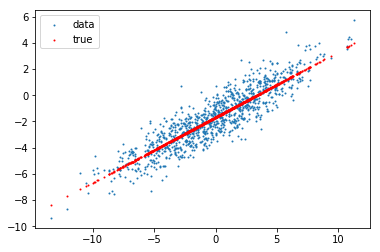

In [25]:
plt.scatter(X, y, s=1, label="data")
plt.scatter(X, y_true, s=1, color='r', label="true")
plt.legend()

In [26]:
def get_variable_from_np(X):
    return Variable(torch.from_numpy(X)).float()

class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.x2o = nn.Linear(input_size, output_size)
        
    def forward(self, X):
        return self.x2o(X)

In [27]:
batch_size = 10
batch = get_variable_from_np(X[:batch_size])
batch

Variable containing:
-2.8127
-1.9611
-1.2873
-7.0203
 0.8267
-8.0451
-2.2290
 1.3489
 6.1953
-5.4829
[torch.FloatTensor of size 10x1]

In [28]:
model = LinearRegression(1, 1)

In [29]:
y_pred = model.forward(batch)
y_pred

Variable containing:
-1.4948
-1.0687
-0.7315
-3.5999
 0.3262
-4.1127
-1.2027
 0.5875
 3.0123
-2.8307
[torch.FloatTensor of size 10x1]

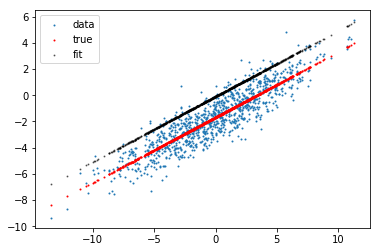

In [30]:
batch = get_variable_from_np(X[:])
y_pred = model.forward(batch)
y_pred_np = y_pred.squeeze().data.numpy()
plt.scatter(X, y, s=1, label="data")
plt.scatter(X, y_true, s=1, color='r', label="true")
plt.scatter(X, y_pred_np, s=1, color='k', alpha=0.5, label="fit")
plt.legend()

### Define loss criterion and optimizer

In [31]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
losses = []

## Train the model

Loss at epoch [9]: 3.817
Loss at epoch [19]: 3.182
Loss at epoch [29]: 1.689
Loss at epoch [39]: 1.340
Loss at epoch [49]: 1.282
Loss at epoch [59]: 0.983
Loss at epoch [69]: 1.127
Loss at epoch [79]: 0.749
Loss at epoch [89]: 1.235
Loss at epoch [99]: 1.882


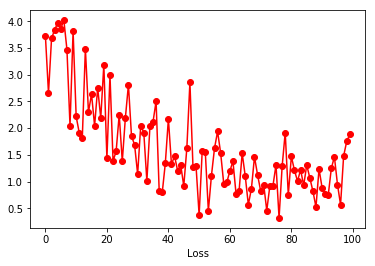

In [32]:
batch_size = 10
epochs = 100
print_every = 10

for i in range(epochs):
    loss = 0
    optimizer.zero_grad() # Important for each epoch
    idx = np.random.randint(X.shape[0], size=batch_size)
    batch = get_variable_from_np(X[idx])
    target = get_variable_from_np(y[idx])
    output = model.forward(batch)
    loss += criterion(output, target)
    loss.backward() # Calculate the gradients
    optimizer.step() # Updates the parameters of the model
    if (i+1) % print_every == 0:
        print("Loss at epoch [%s]: %.3f" % (i, loss.data[0]))
    losses.append(loss.data[0])
    
plt.plot(losses, '-or')
plt.xlabel("Epoch")
plt.xlabel("Loss")

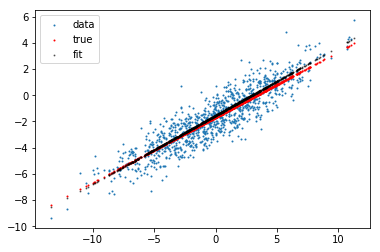

In [33]:
batch = get_variable_from_np(X[:])
y_pred = model.forward(batch)
y_pred_np = y_pred.squeeze().data.numpy()
plt.scatter(X, y, s=1, label="data")
plt.scatter(X, y_true, s=1, color='r', label="true")
plt.scatter(X, y_pred_np, s=1, color='k', alpha=0.5, label="fit")
plt.legend()

In [34]:
list(model.x2o.parameters())

[Parameter containing:
  0.5231
 [torch.FloatTensor of size 1x1], Parameter containing:
 -1.5446
 [torch.FloatTensor of size 1]]

In [35]:
model.x2o.weight

Parameter containing:
 0.5231
[torch.FloatTensor of size 1x1]

In [36]:
model.x2o.bias

Parameter containing:
-1.5446
[torch.FloatTensor of size 1]

In [37]:
print("Model W: %.3f, True W: %.3f" % (model.x2o.weight.data.numpy(), W))
print("Model bias: %.3f, True bias: %.3f" % (model.x2o.bias.data.numpy(), bias))

Model W: 0.523, True W: 0.500
Model bias: -1.545, True bias: -1.680
